# IS 4487 Lab 3

## Outline

Repeat exercises from Lab 2, but with the *SuperStore Retail Orders* dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_03_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [189]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

## Prepare Data

➡️ Assignment Tasks
- Create a "revenue" variable and make sure it is a numeric datatype
- Remove rows with empty (NULL) values
- Locate outliers in at least two of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [193]:
df['revenues'] = df['product_price'] * df['quantity']
df.dropna(inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

In [195]:
df['order_year'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df.dropna(subset=['order_year_month'], inplace=True)
df['order_year'] = df['order_year'].dt.year
df.dropna(subset=['order_year'], inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

In [204]:
df_clean = df[(df['quantity'] < 100) & (df['product_price'] < 3000)]
df_clean['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df_clean['order_year'] = df_clean['order_year_month'].dt.year
df_clean = df_clean[(df_clean['order_year'] > 2000) & (df_clean['order_year'] < 2028)]
print(df_clean)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01       2023-07-01     Audrey Blanco   
1         51187  2023-07-01       2023-07-01       Isaac Allen   
2         51199  2023-07-02       2023-07-01        Ian Morgan   
3         51241  2023-07-04       2023-07-01        Alexa Bell   
4         51297  2023-07-08       2023-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29       2024-06-01        Ian Rogers   
56039     74062  2024-06-29       2024-06-01   Marcus Anderson   
56040     74065  2024-06-29       2024-06-01  Nathaniel Howard   
56041     74038  2024-06-29       2024-06-01        Robin Sanz   
56042     74110  2024-06-30       2024-06-01   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

<ipython-input-204-da1d3d403ffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
<ipython-input-204-da1d3d403ffc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_year'] = df_clean['order_year_month'].dt.year


## Summarize Data

➡️ Assignment Tasks
- Display the average price per product line
- Display the total revenue for all months

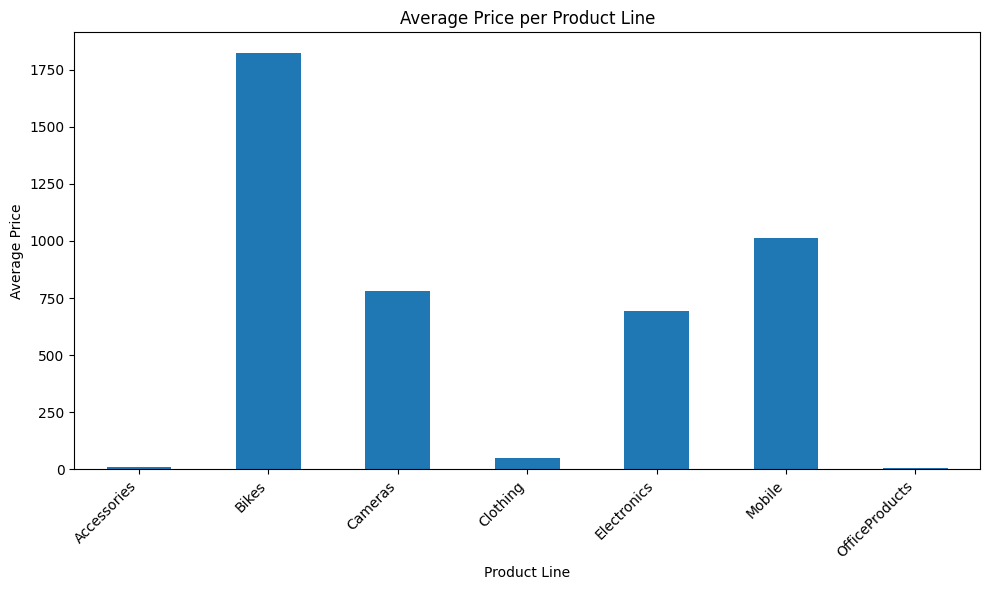

In [126]:
average_price_per_product_line = df_clean.groupby('product_line')['product_price'].mean()
plt.figure(figsize=(10, 6))
average_price_per_product_line.plot(kind='bar')
plt.title('Average Price per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

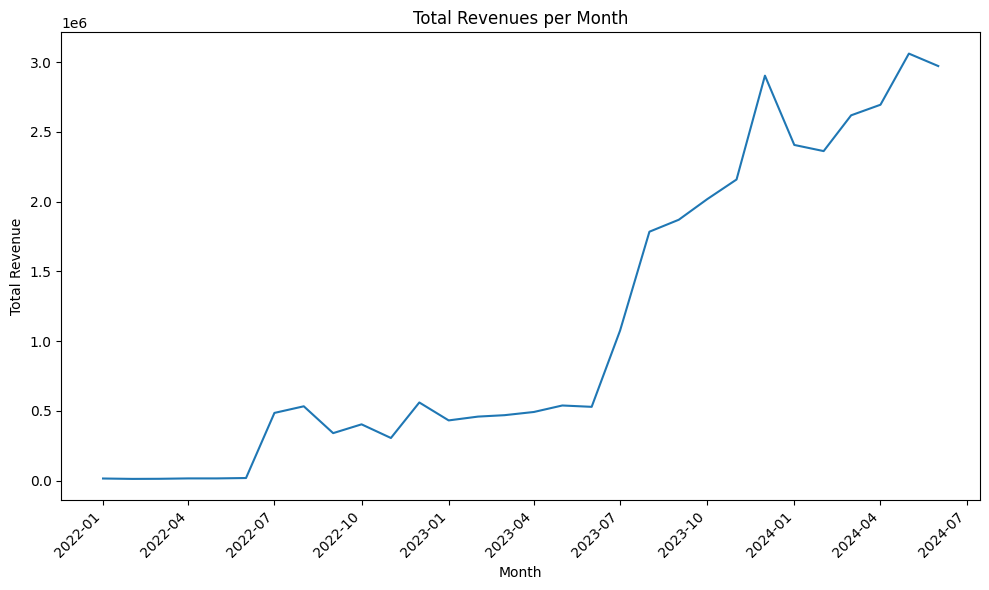

In [205]:
monthly_revenue = df_clean.groupby('order_year_month')['revenues'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenues per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()